In [1]:
# Importing pandas to read data
import pandas as pd
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/gender_classification.csv')
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [2]:
# Shape of the data
data.shape

(5001, 8)

#**Preprocessing and defining features**

In [5]:
# Counting labels
data['gender'].value_counts()

Female    2501
Male      2500
Name: gender, dtype: int64

In [6]:
# Lableeing with numerical values
data['gender'] = data['gender'].replace(to_replace=['Female', 'Male'], value=[0, 1])
data['gender'].value_counts()

0    2501
1    2500
Name: gender, dtype: int64

In [7]:
# Defining input and output features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [8]:
# Checking shape of input-output features
print(X.shape)
print(y.shape)

(5001, 7)
(5001,)


In [9]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
# Shape of train-test sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 7)
(4000,)
(1001, 7)
(1001,)


#**Defining the neural network**

So will build ANN using a Keras sequential model, a model which sequentially combines the layers of the network. The Keras Dense layers are used as neurons of the networks.

In [11]:
# Libraries for neural networks
from keras.models import Sequential
from keras.layers import Dense

Next, we will initialize the sequential model, and add the dense layers to the model. Our model consists of 3 layers. The first input layers consist of the 12 neurons for 7 input features and these neurons will be activated according to the Relu activation function. 

The next hidden layer is 8 neurons with activation of Relu and the last layer will consist of only one neuron because we are going to predict the only one class from the at the time this layer will have activation function as sigmoid which is the most suitable activation function for binary classification problem. 

In [12]:
# Defining the neural network model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [13]:
# Summary of the neural network model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                96        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compiling the classifier
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# **Training the neural network**

The training instances for each epoch are calculated as: our training is having 4000 instances and we have chosen a batch size of 10 so for each epoch model will experience (4000/10) = 400 instances. 

In [19]:
# Training the classifier
history=model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1144 - accuracy: 0.9567
Epoch 2/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1119 - accuracy: 0.9525
Epoch 3/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1053 - accuracy: 0.9595
Epoch 4/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1061 - accuracy: 0.9590
Epoch 5/10
400/400 [==============================] - 1s 1ms/step - loss: 0.0995 - accuracy: 0.9607
Epoch 6/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1030 - accuracy: 0.9578
Epoch 7/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1038 - accuracy: 0.9578
Epoch 8/10
400/400 [==============================] - 1s 1ms/step - loss: 0.0981 - accuracy: 0.9560
Epoch 9/10
400/400 [==============================] - 1s 1ms/step - loss: 0.1011 - accuracy: 0.9563
Epoch 10/10
400/400 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9570

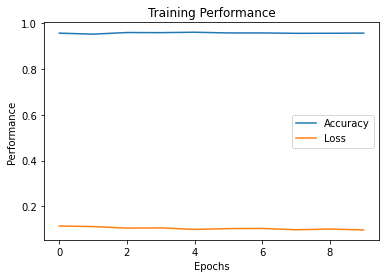

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['loss'], label = 'Loss')
plt.title('Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [21]:
# Checking training and test accuracies
scores = model.evaluate(X_train, y_train)
print ("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test)
print ("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

125/125 [==============================] - 1s 4ms/step - loss: 0.0891 - accuracy: 0.9590
Training Accuracy: 95.90%

32/32 [==============================] - 0s 4ms/step - loss: 0.1149 - accuracy: 0.9481
Testing Accuracy: 94.81%

